In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


path = '/content/drive/MyDrive/Sem-7 Books/EE4708/Assignment-3/' ### CHANGE TO PATH OF DATASETS TO RUN

In [3]:
df = pd.read_csv(path+'adult.csv', header=None, na_values=[' ?'])
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.isna().sum()

0        0
1     1836
2        0
3        0
4        0
5        0
6     1843
7        0
8        0
9        0
10       0
11       0
12       0
13     583
14       0
dtype: int64

In [5]:
### PRINTING ALL UNIQUE VALUES IN EACH COLUMN
for i in df.columns:
  print(i, df[i].nunique())
  print(df[i].unique())
  print("--------------")

0 73
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
--------------
1 8
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 nan ' Self-emp-inc' ' Without-pay' ' Never-worked']
--------------
2 21648
[ 77516  83311 215646 ...  34066  84661 257302]
--------------
3 16
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
--------------
4 16
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
--------------
5 7
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
--------------
6 14
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repai

In [6]:
# OBSERVING MIN, MAX, MEDIAN OF EACH NUMERIC COLUMN
df.describe()

,0,2,4,10,11,12
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
# RENAMING COLUMNS ACCORDING TO INFORMATION GIVEN
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'edu-years', 'marriage',
              'occupation', 'relationship', 'race', 'sex', 'capgain', 'caploss',
              'working-hours', 'country', 'wage']

In [9]:
# DROPPING MISSING VALUES
df.isna().sum()
# df.dropna(inplace=True)

age                 0
workclass        1836
fnlwgt              0
education           0
edu-years           0
marriage            0
occupation       1843
relationship        0
race                0
sex                 0
capgain             0
caploss             0
working-hours       0
country           583
wage                0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


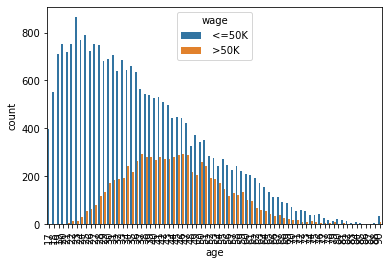

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


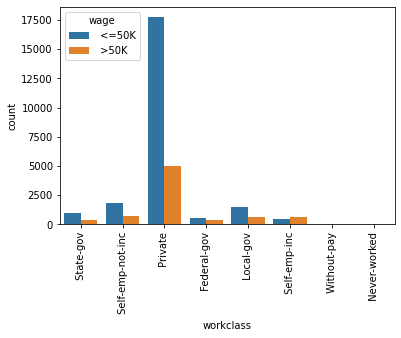

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


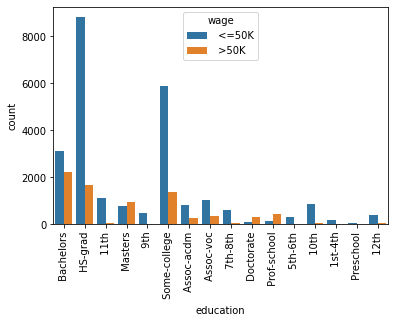

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


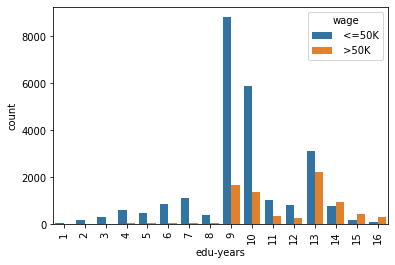

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


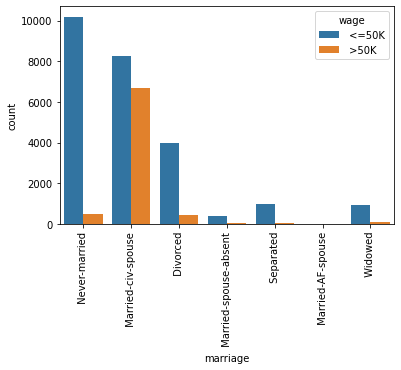

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


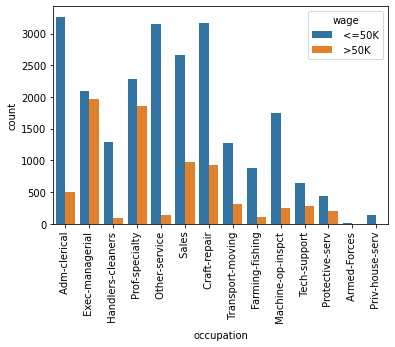

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


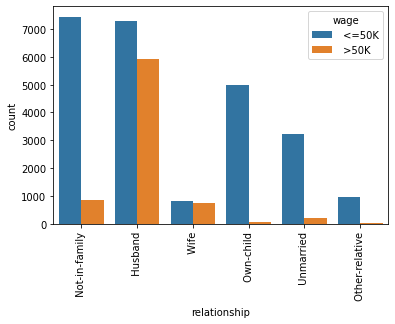

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


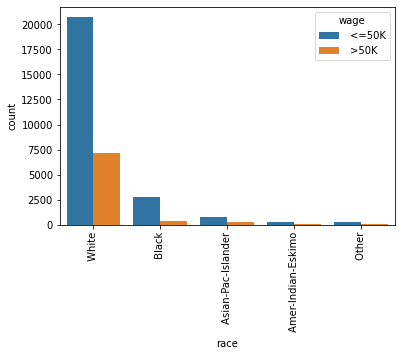

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


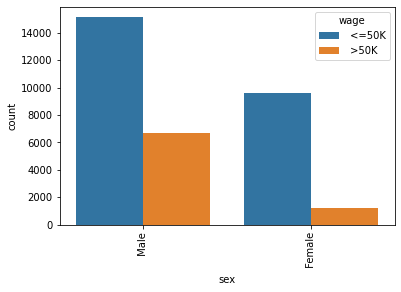

In [10]:
# PLOTTING COUNTS OF EACH FEATURE SPLITTING BY WAGE
test_cols = ['age', 'workclass', 'education', 'edu-years', 'marriage',
              'occupation', 'relationship', 'race', 'sex']
for i in test_cols:
  sns.countplot(i, hue='wage', data=df)
  plt.xticks(rotation=90)
  plt.show()

In [11]:
# PROPORTION OF PEOPLE IN EACH WAGE CLASS SPLIT BY CATEGORIES
for j in test_cols:
  # print(df.value_counts([i, "wage"], normalize=True ).sort_index())
  print(df.groupby(j).agg({'wage':'value_counts'}).groupby(level=0).transform(lambda x: x.div(x.sum())))
  print("========================")


                wage
age wage            
17   <=50K  1.000000
18   <=50K  1.000000
19   <=50K  0.997191
     >50K   0.002809
20   <=50K  1.000000
...              ...
86   <=50K  1.000000
87   <=50K  1.000000
88   <=50K  1.000000
90   <=50K  0.813953
     >50K   0.186047

[138 rows x 1 columns]
                              wage
workclass         wage            
 Federal-gov       <=50K  0.613542
                   >50K   0.386458
 Local-gov         <=50K  0.705208
                   >50K   0.294792
 Never-worked      <=50K  1.000000
 Private           <=50K  0.781327
                   >50K   0.218673
 Self-emp-inc      >50K   0.557348
                   <=50K  0.442652
 Self-emp-not-inc  <=50K  0.715073
                   >50K   0.284927
 State-gov         <=50K  0.728043
                   >50K   0.271957
 Without-pay       <=50K  1.000000
                          wage
education     wage            
 10th          <=50K  0.933548
               >50K   0.066452
 11th          <=50

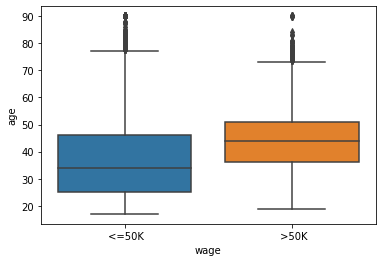

In [12]:
sns.boxplot(y='age', x='wage', data=df)
plt.show()

In [13]:
df.head() ## OBSERVNG A FEW SAMPLES FROM THE DATASET

,age,workclass,fnlwgt,education,edu-years,marriage,occupation,relationship,race,sex,capgain,caploss,working-hours,country,wage
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


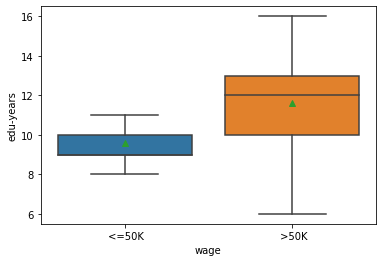

In [14]:
sns.boxplot(y='edu-years', x='wage', data=df, showfliers=False, showmeans=True)


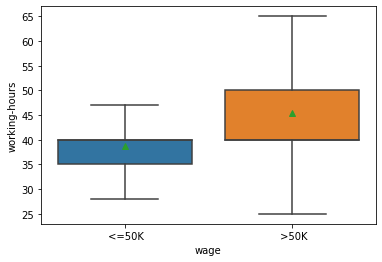

In [15]:
sns.boxplot(y='working-hours', x='wage', data=df, showfliers=False, showmeans=True)


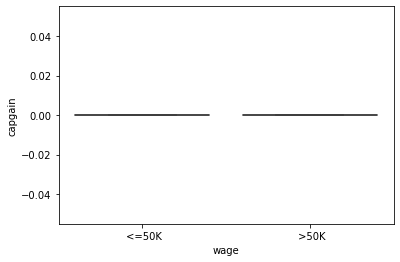

In [16]:
sns.boxplot(y='capgain', x='wage', data=df, showfliers=False)


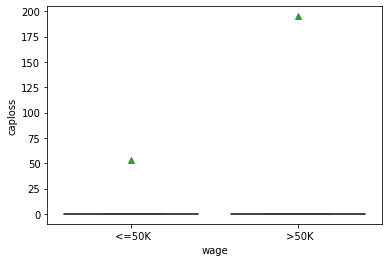

In [17]:
sns.boxplot(y='caploss', x='wage', data=df, showfliers=False, showmeans=True)

In [18]:
# REPLACING WAGE CLASSES BY BINARY VALUES
wage_dict = {' <=50K':0,  ' >50K':1}
df = df.replace({"wage":wage_dict})

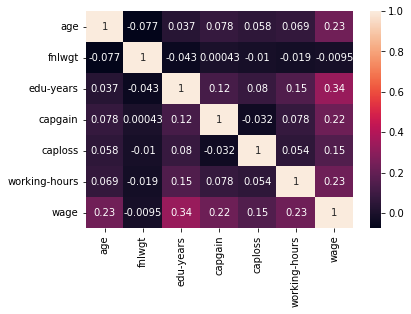

In [19]:
# HEATMAP OF CORRELATION AMONG FEATURES
sns.heatmap(df.corr(), annot=True)

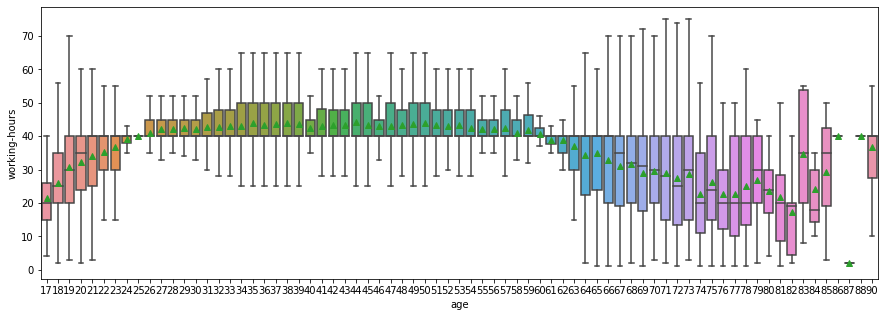

In [20]:
plt.figure(figsize=(15,5))
sns.boxplot(y='working-hours', x='age', data=df, showfliers=False, showmeans=True)
# plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

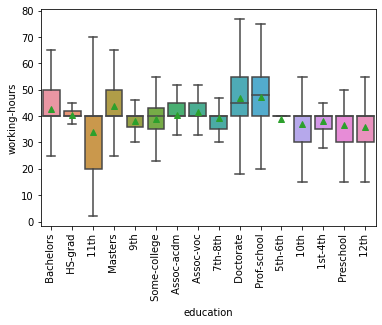

In [21]:
sns.boxplot(y='working-hours', x='education', data=df, showfliers=False, showmeans=True)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

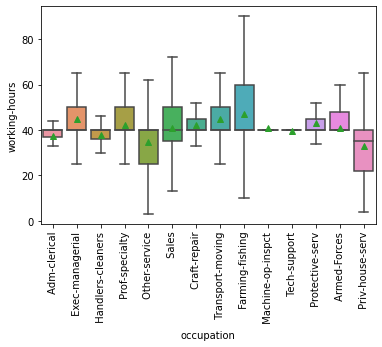

In [22]:
sns.boxplot(y='working-hours', x='occupation', data=df, showfliers=False, showmeans=True)
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

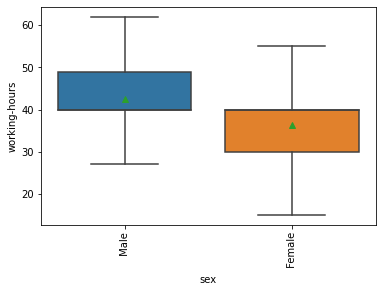

In [23]:
sns.boxplot(y='working-hours', x='sex', data=df, showfliers=False, showmeans=True)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

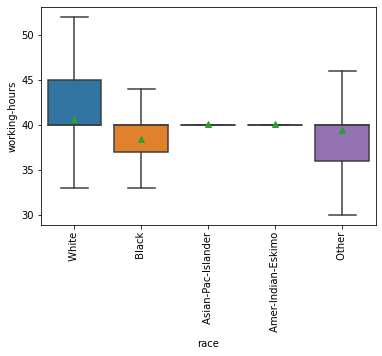

In [24]:
sns.boxplot(y='working-hours', x='race', data=df, showfliers=False, showmeans=True)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

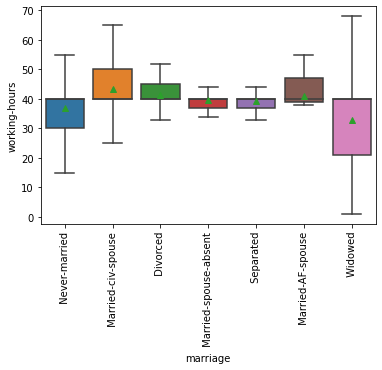

In [25]:
sns.boxplot(y='working-hours', x='marriage', data=df, showfliers=False, showmeans=True)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

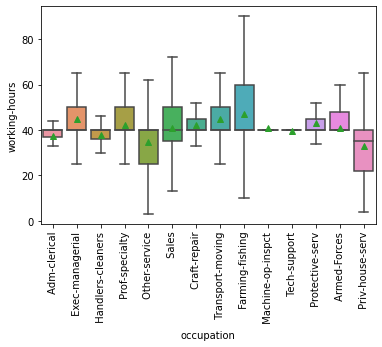

In [26]:
sns.boxplot(y='working-hours', x='occupation', data=df, showfliers=False, showmeans=True)
plt.xticks(rotation=90)

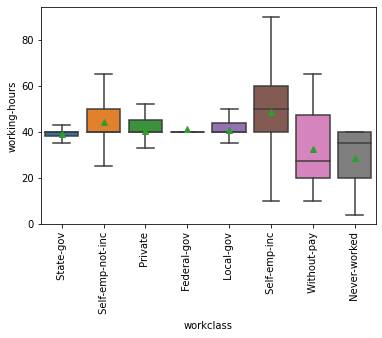

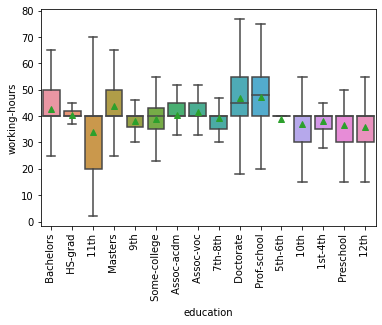

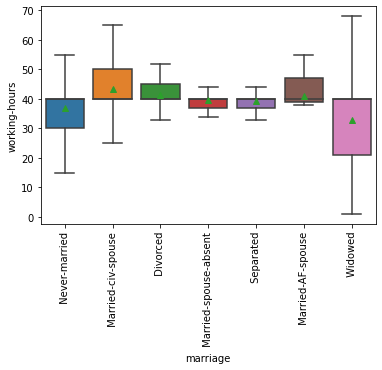

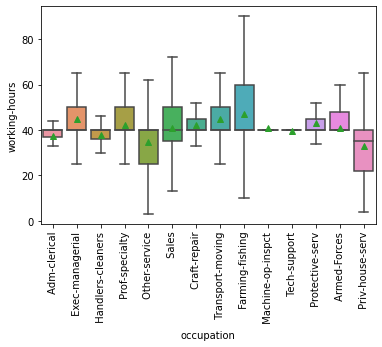

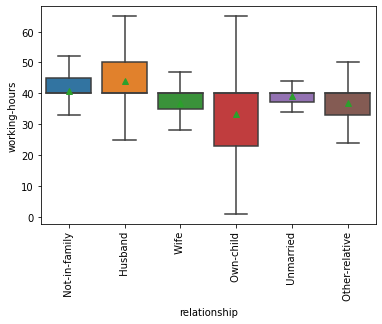

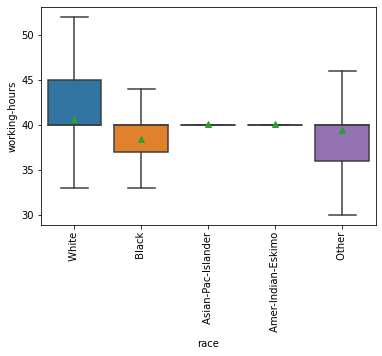

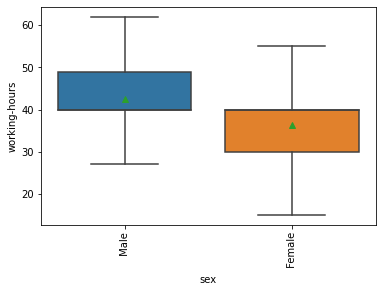

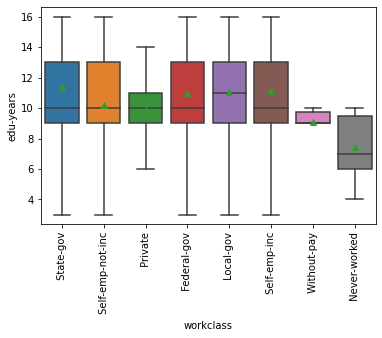

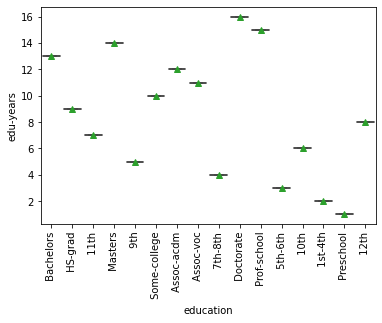

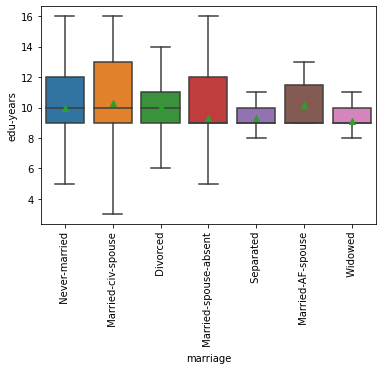

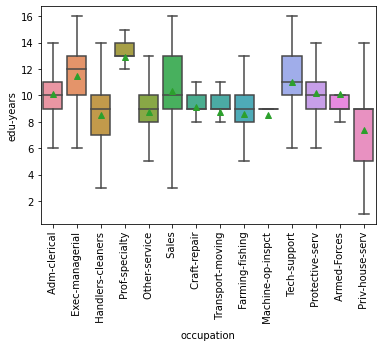

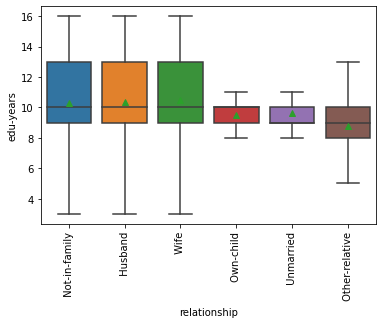

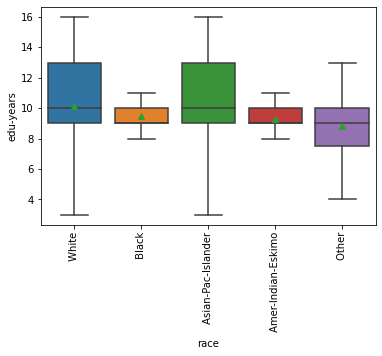

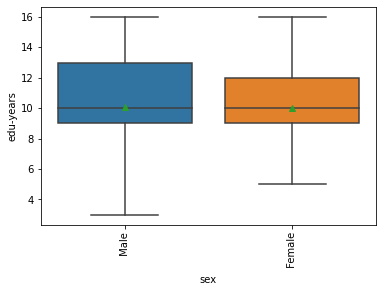

In [27]:
# boxplots
x = ['working-hours', 'edu-years']
y = ['workclass', 'education', 'marriage', 'occupation', 'relationship', 'race', 'sex']
for n in x:
  for m in y:
   sns.boxplot(y=n, x=m, data=df, showfliers=False, showmeans=True)
   plt.xticks(rotation=90) 
   plt.show()

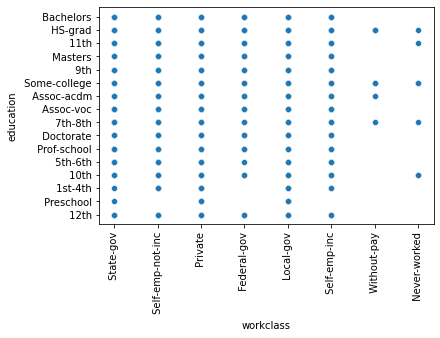

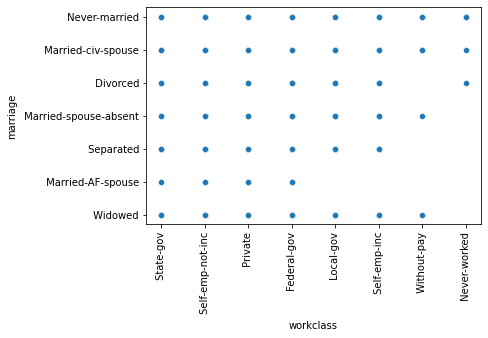

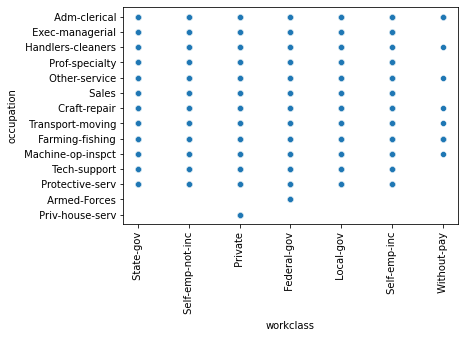

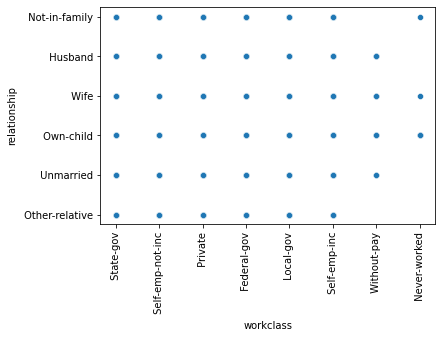

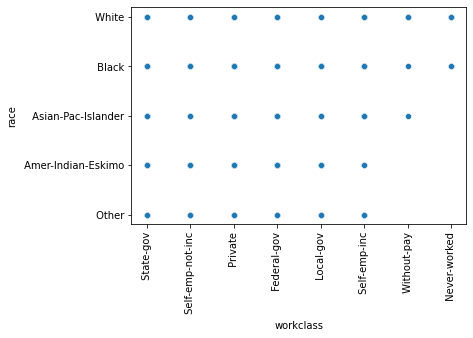

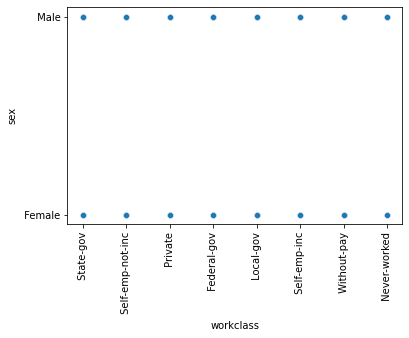

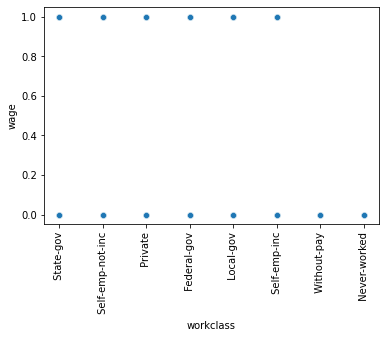

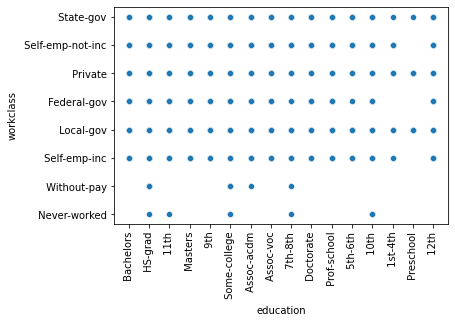

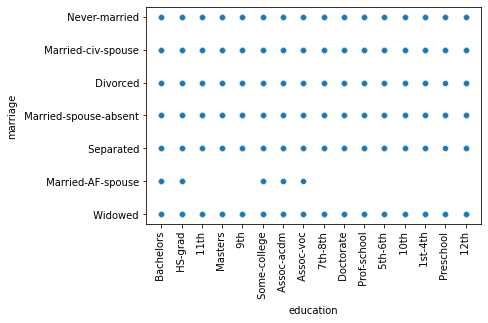

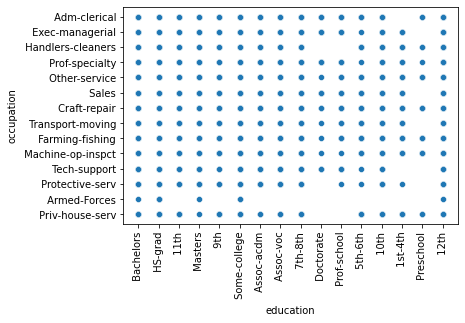

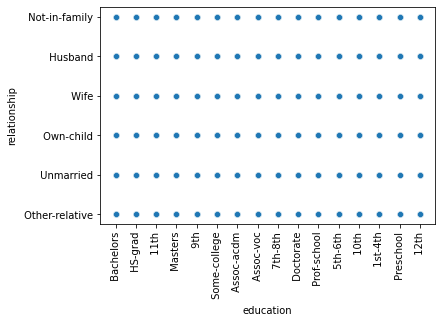

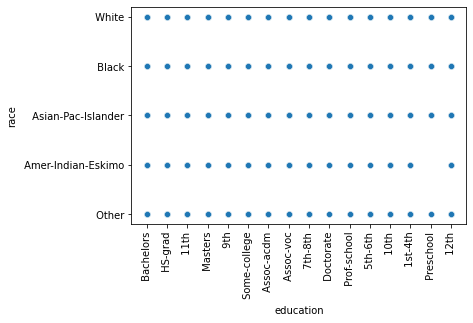

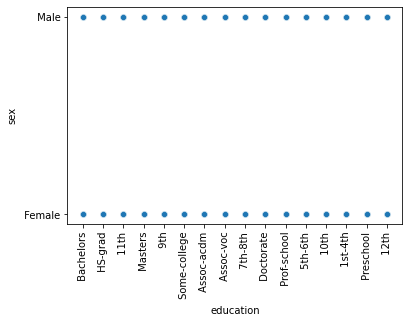

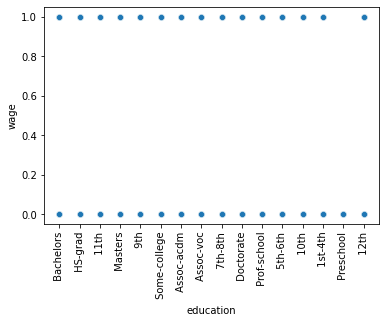

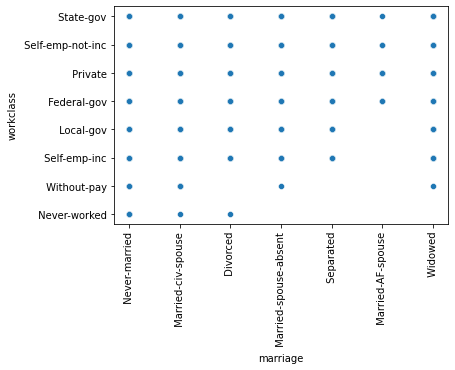

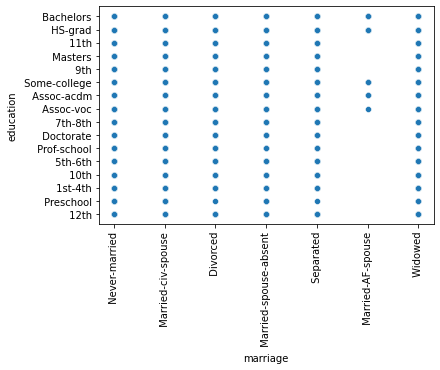

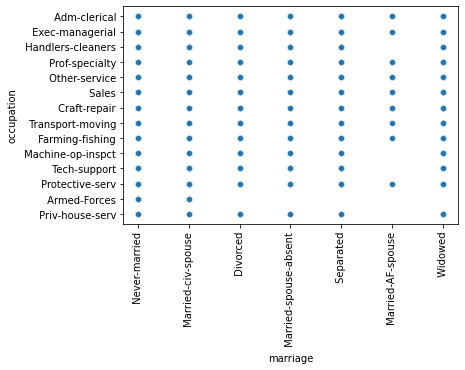

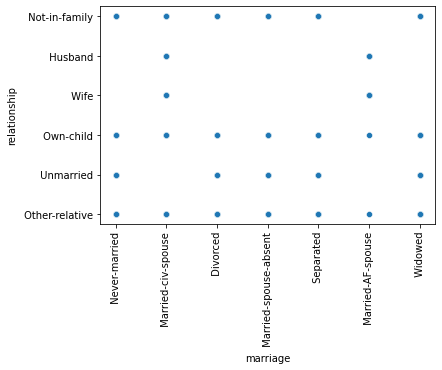

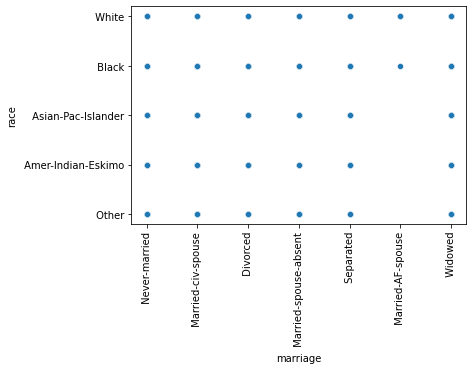

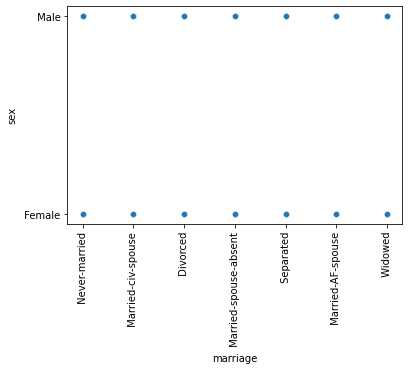

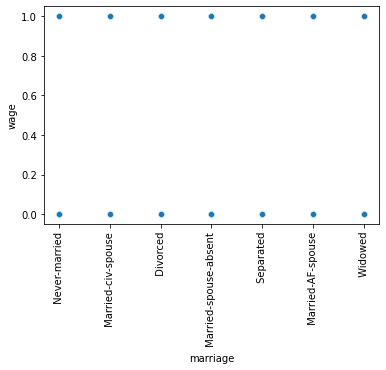

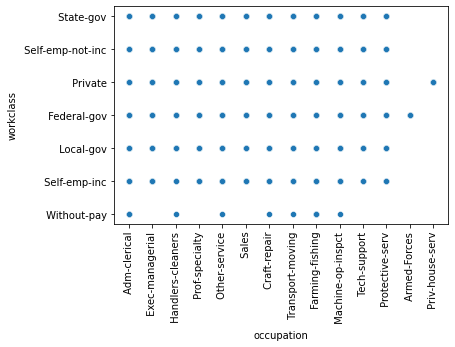

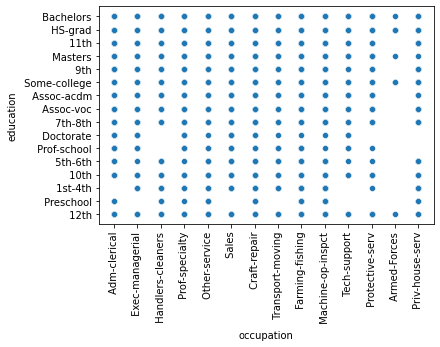

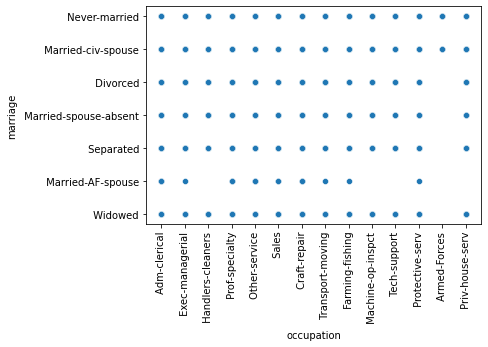

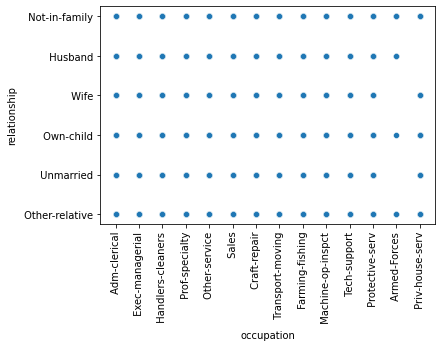

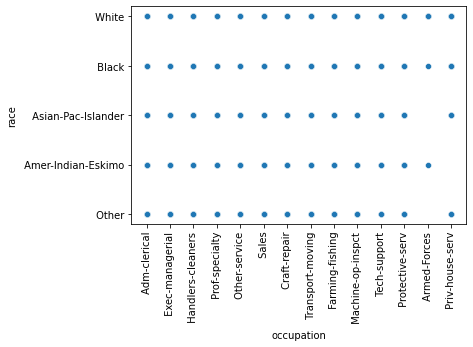

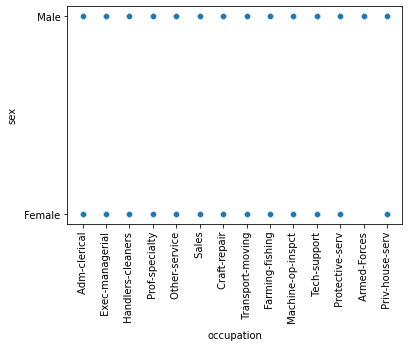

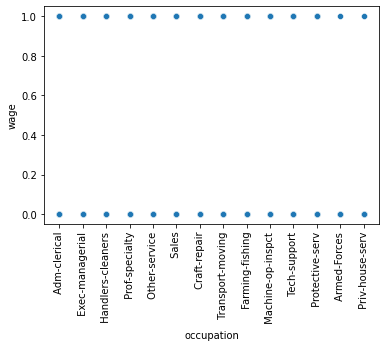

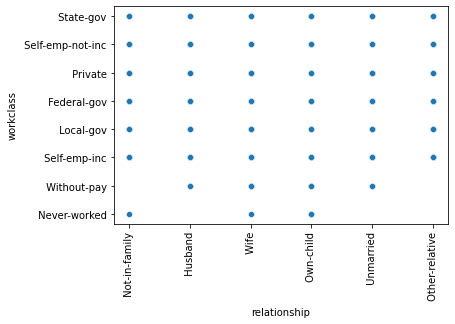

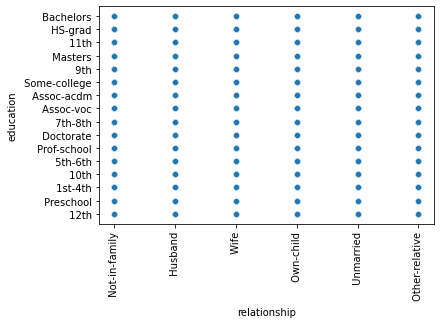

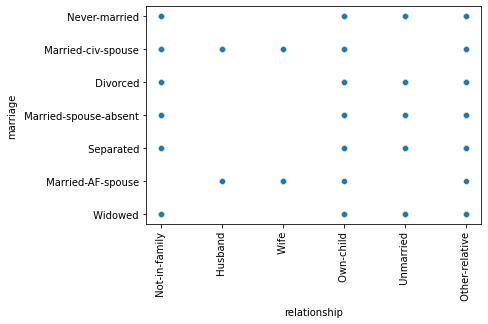

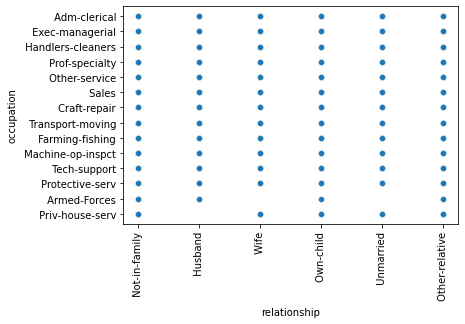

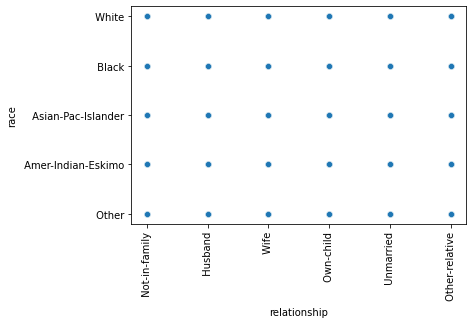

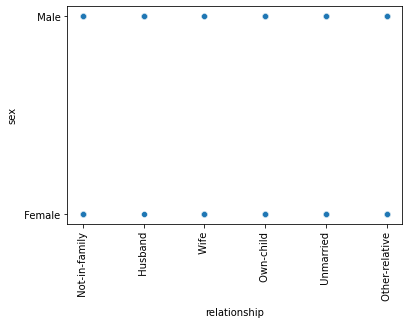

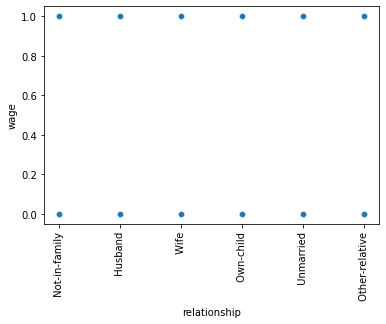

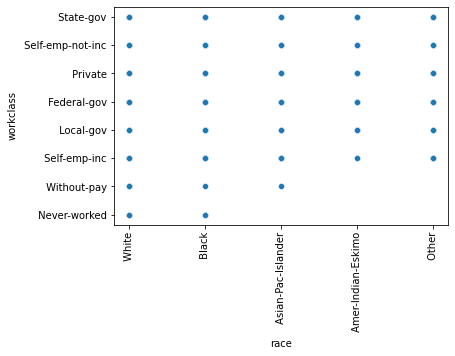

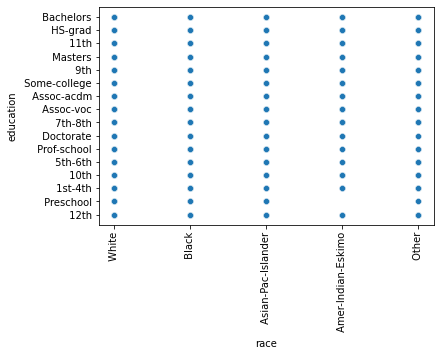

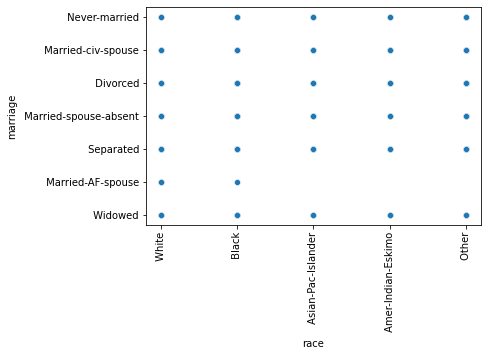

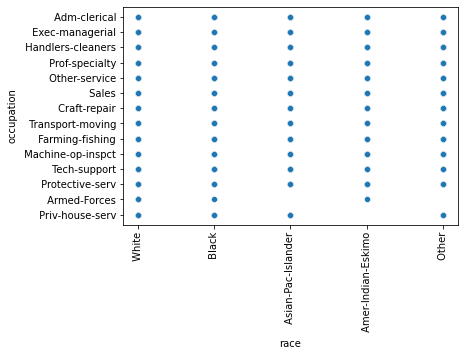

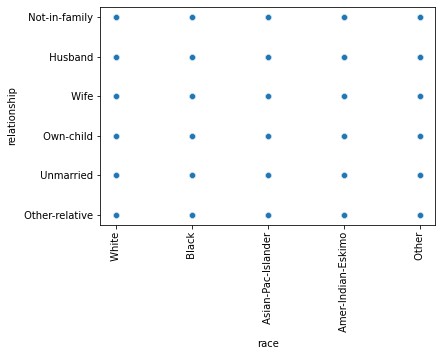

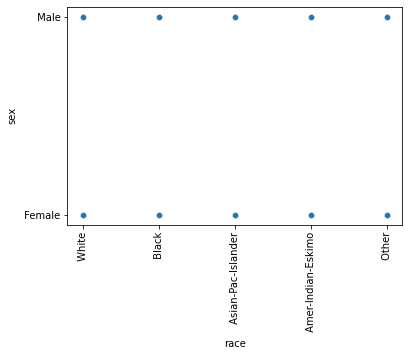

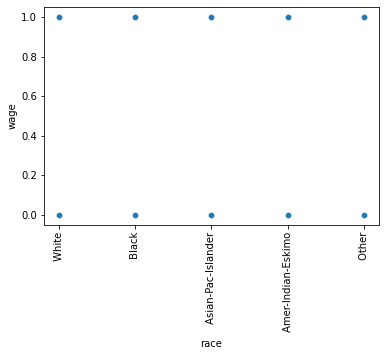

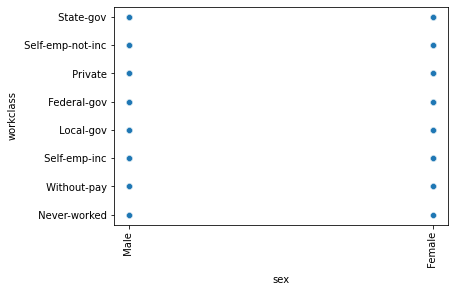

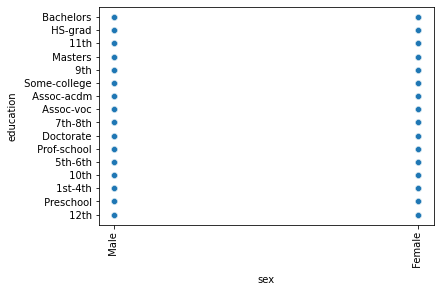

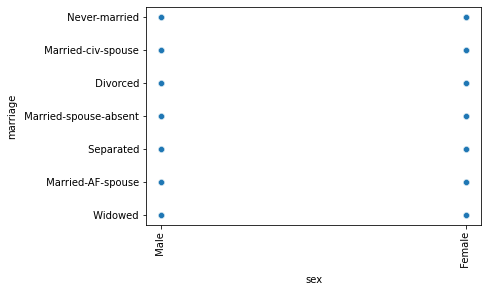

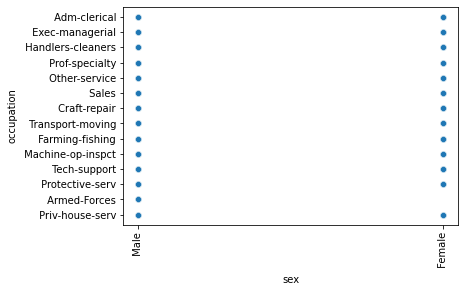

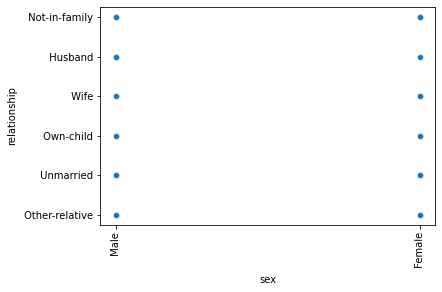

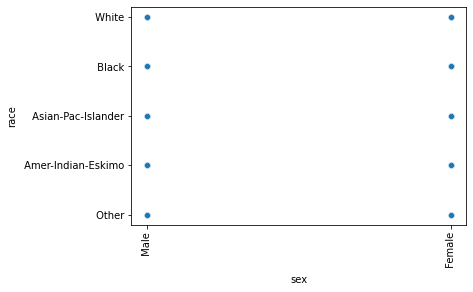

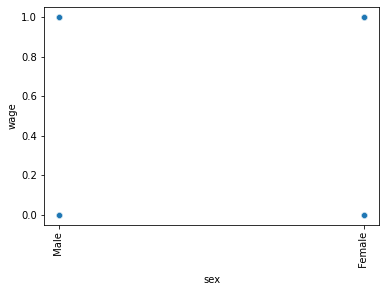

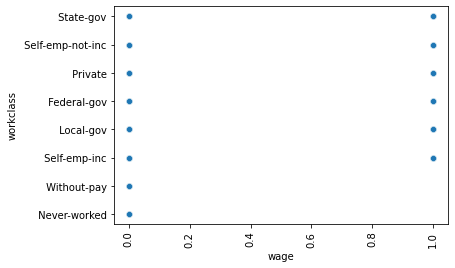

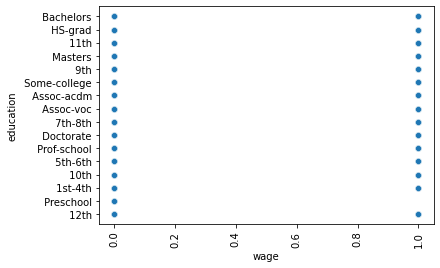

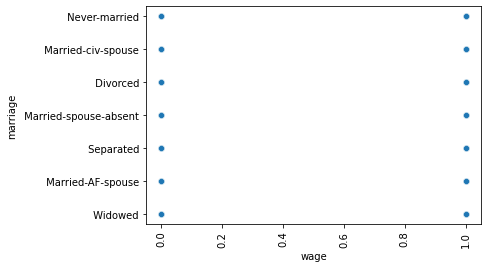

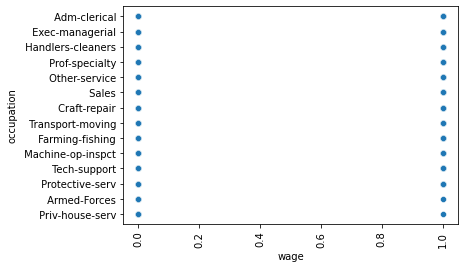

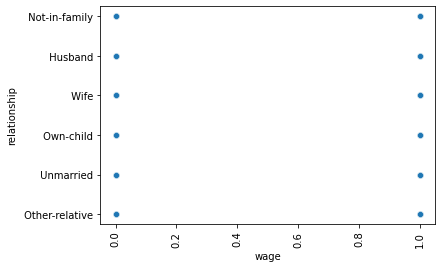

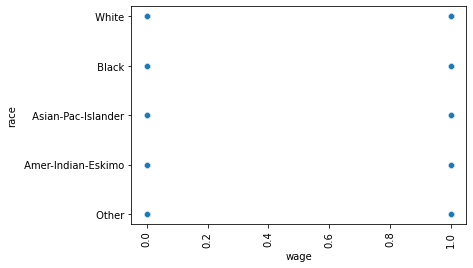

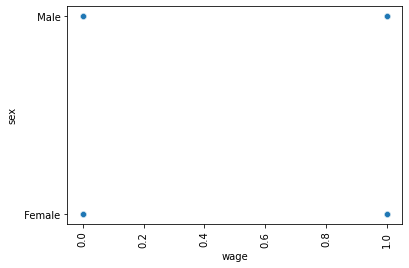

In [28]:
# scatterplots

x = ['working-hours', 'edu-years']
y = ['workclass', 'education', 'marriage', 'occupation', 'relationship', 'race', 'sex','wage']
for n in y:
  for m in y:
   if n!=m:
    sns.scatterplot(y=m, x=n, data=df)
    plt.xticks(rotation=90) 
    plt.show()

In [29]:
# LABEL ENCODING CATEGORICAL COLUMNS
cols = ['workclass', 'education', 'marriage', 'occupation', 'race', 'sex', 'country', 'relationship']
for i in cols:
  df[i] = df[i].astype('category')
  df[i] = df[i].cat.codes

In [30]:
# CREATING X AND Y
X = df.drop(['wage'], axis=1)
y = df['wage']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 16281 points : 3305


In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.88     12323
           1       0.68      0.32      0.43      3958

    accuracy                           0.80     16281
   macro avg       0.74      0.63      0.65     16281
weighted avg       0.78      0.80      0.77     16281



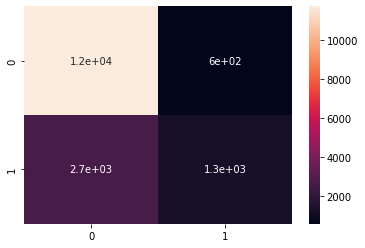

In [33]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)